# Unsupervised Machile Learning

In [23]:
# Imports

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [2]:
# Reading Data 
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
print("Number of Rows : ", df.shape[0])
print("Number of columns : ", df.shape[1])

Number of Rows :  200
Number of columns :  5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Checking Null Values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# Using only two columns i.e. Annual Income and Spending Score

x = df[['Annual Income (k$)','Spending Score (1-100)']]

In [17]:
kmean = KMeans()
kmean.fit(x)

KMeans()

In [18]:
kmean = KMeans()
kmean.fit_predict(x)

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 6, 4, 6, 6,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 6, 6, 6, 6,
       6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5], dtype=int32)

In [19]:
# As default value for n_cluster is 8 so it has divided the data into 8 clusters

In [20]:
# Finding Optimal Clusters Using Elbow Method

In [21]:
wcss = []

for i in range(1,11):
  k_mean = KMeans(n_clusters = i)
  k_mean.fit(x)
  wcss.append(k_mean.inertia_)

In [22]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 31573.817686097427,
 25011.839349156588,
 22119.99312141347,
 19653.383606248826]

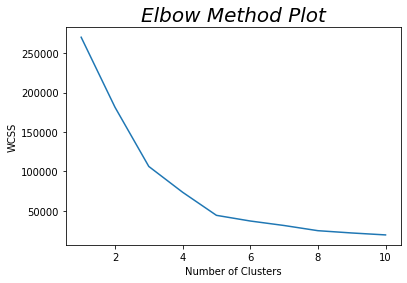

In [28]:
# Ploting the result

plt.plot(range(1,11),wcss)
plt.title("Elbow Method Plot", fontdict={'fontsize':20, 'style':'oblique'})
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
# from the graph we can conclude that the optimal number of cluster is 5

In [31]:
# Final Model

kmeans = KMeans(n_clusters=5, random_state=123)

In [32]:
y_means = kmeans.fit_predict(x)

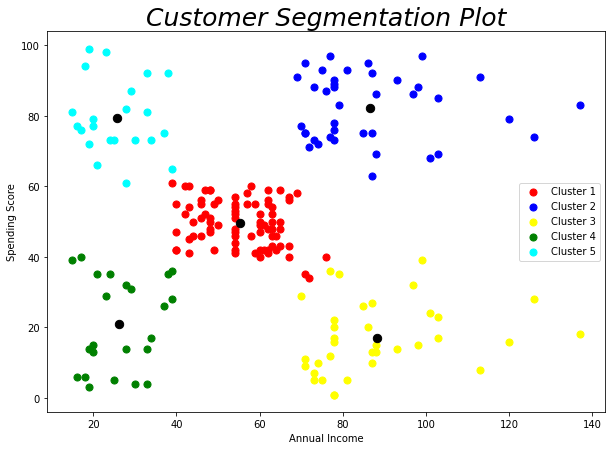

In [38]:
# Visulaize the result
plt.figure(figsize=(10,7))
plt.scatter(x.iloc[y_means==0,0], x.iloc[y_means==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(x.iloc[y_means==1,0], x.iloc[y_means==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(x.iloc[y_means==2,0], x.iloc[y_means==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x.iloc[y_means==3,0], x.iloc[y_means==3,1], s=50, c='green', label='Cluster 4')
plt.scatter(x.iloc[y_means==4,0], x.iloc[y_means==4,1], s=50, c='cyan', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70, c='black')

plt.title("Customer Segmentation Plot",fontdict={'fontsize':25, 'style':'oblique'})
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

### From the graph we can conclude the cluster as

- Customers with Low annual income and Low Spending Score = Cluster 4 in Green Color
- Customers with Low annual income and High Spending Score = Cluster 5 in Green Color
- Customers with medium annual income and medium Spending Score = Cluster 1 in Red Color
- Customers with High annual income and Low Spending Score = Cluster 3 in Yellow Color
- Customers with High annual income and High Spending Score = Cluster 2 in Blue Color

In [40]:
# Save Model
import joblib
joblib.dump(kmeans, "Customer_Segmentation")

['Customer_Segmentation']

In [41]:
# to load model
model = joblib.load('Customer_Segmentation')

In [42]:
# GUI

In [47]:
from tkinter import *

In [50]:
def show_entry_fields():
  p1 = int(e1.get())
  p2 = int(e2.get())

  model = joblib.load('Customer_Segmentation')
  result = model.predict([[p1,p2]])

  print("This customer belongs to cluster no : ", result[0])

  if result[0] == 0:
    Label(master, text="Customers with Medium annual income and Medium Spending Score")
  elif result[0] == 1:
    Label(master, text="Customers with High annual income and Low Spending Score")
  elif result[0] == 2:
    Label(master, text="Customers with Low annual income and Low Spending Score")
  elif result[0] == 3:
    Label(master, text="Customers with Medium annual income and Medium Spending Score")
  elif result[0] == 4:
    Label(master, text="Customers with Medium annual income and Medium Spending Score")



In [52]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 785 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.13 [785 kB]
Fetched 785 kB in 1s (1,442 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.13_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.13) ...
Setting up xvfb (2:1.19.6-1ubuntu4.13) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
master = Tk()
master.title("Customer Segmentation Using Machine Learning")

label = Label(master, text = "Customer Segmentation Using Machine Learning", bg = 'black', fg = 'white').grid(row=0,columnspan=2)

Label(master, text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='Predict', command= show_entry_fields).grid()
mainloop()
  